
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Load and Explore Data

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

CLEAN THE DATA

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Visualize the distribution of glucose and related health indicators.

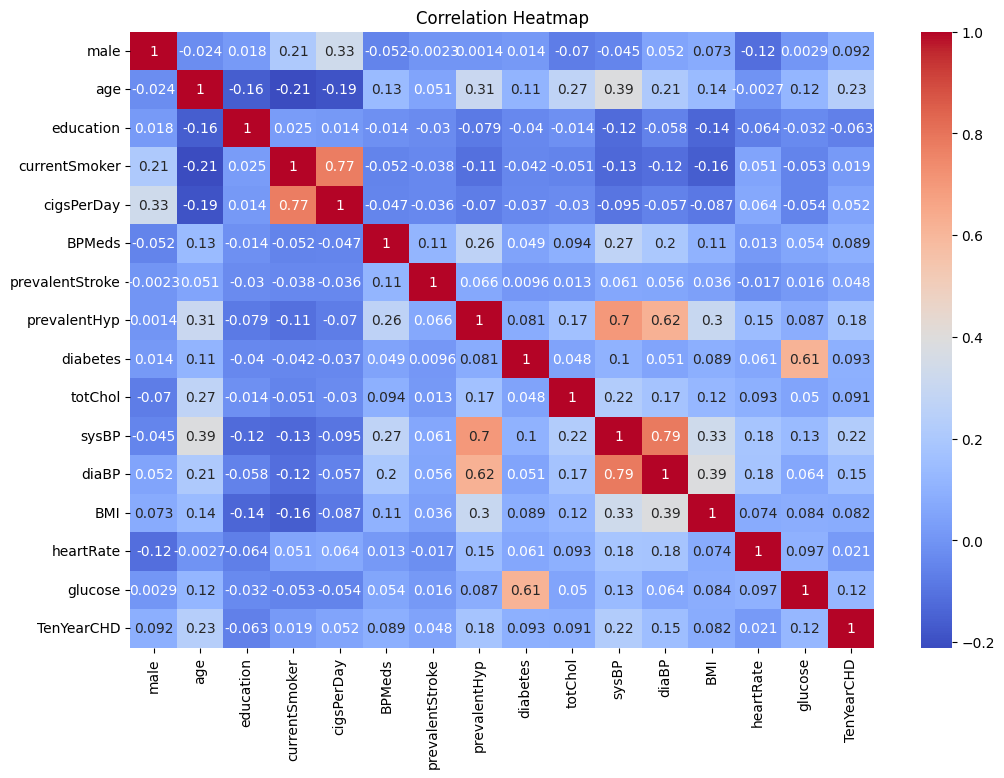

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Perform feature selection and engineering

In [10]:
x=df.drop(columns='glucose',axis=1)
y=df['glucose']
yclass =  (y>125).astype(int)

spliting the data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,yclass,test_size=0.2,stratify=yclass,random_state=2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Train Models

In [13]:
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

log_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluate Models

In [16]:
models = {'Logistic Regression': log_model, 'Decision Tree': tree_model, 'Random Forest': rf_model}

for name, model in models.items():
    print(f"\n--- {name} ---")
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- Logistic Regression ---
Confusion Matrix:
 [[707   9]
 [  5  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       716
           1       0.55      0.69      0.61        16

    accuracy                           0.98       732
   macro avg       0.77      0.84      0.80       732
weighted avg       0.98      0.98      0.98       732


--- Decision Tree ---
Confusion Matrix:
 [[704  12]
 [  8   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       716
           1       0.40      0.50      0.44        16

    accuracy                           0.97       732
   macro avg       0.69      0.74      0.72       732
weighted avg       0.98      0.97      0.97       732


--- Random Forest ---
Confusion Matrix:
 [[715   1]
 [ 13   3]]
Classification Report:
               precision    recall  f1-score   support

           0      

In [18]:
rf_pred = rf_model.predict(x_test)
print("Predicted High Glucose Risk Count:", sum(rf_pred))

Predicted High Glucose Risk Count: 4


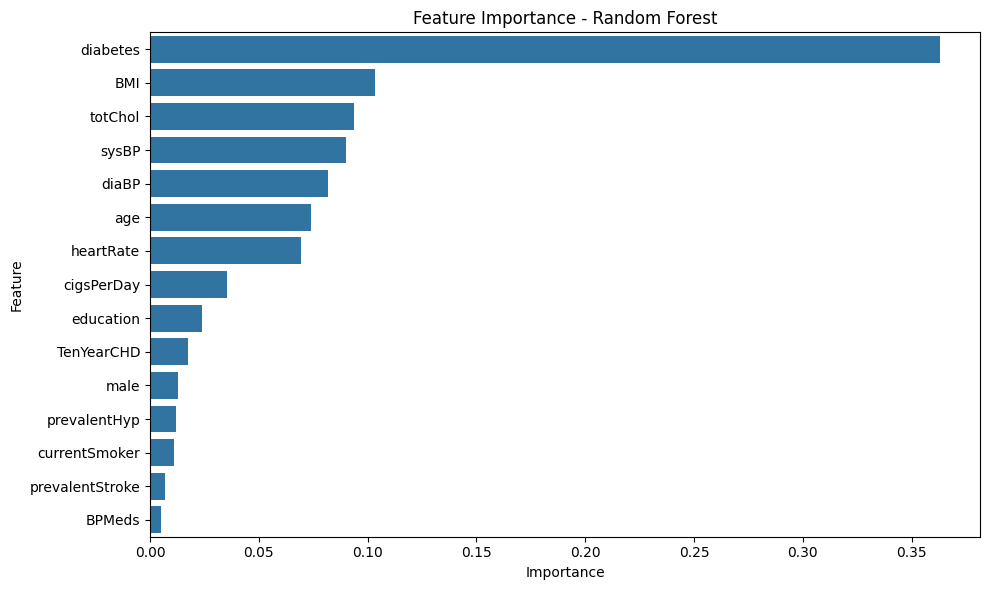

In [19]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()